# Test de chi-cuadrado

El método Chi-cuadrado, es considerado como una prueba no paramétrica que mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida existen diferencias entre ambas, por medio de una prueba de hipótesis PH.

El método de prueba de hipótesis supone a priori el valor de un parámetro y sobre la base de la información obtenida en una muestra, somete a prueba la suposición, para luego tomar con cierta probabilidad, la decisión de rechazar o no la hipótesis.

La prueba de hipótesis PH es un procedimiento que le proporciona al investigador un criterio objetivo para tomar decisiones con base a un número limitado de observaciones.

En este ejercicio se busca diseñar, implementar y verificar una función que calcule el test de “chi-cuadrado” para comparar un histograma con un modelo dado por una distribución Binomial, $B(n=10, p=0.4)$.

Se realizan los siguientes puntos:


## (a) Simule 100 observaciones de la V.A. binomial y calcule las frecuencias de cada valor.

In [1]:
from scipy import stats as st
#from math import *
import numpy as np
import matplotlib.pyplot as plt
#import random
import seaborn as sns

In [2]:
sns.set()

Se sortea 100 veces una variable aleatoria binomial con la función de 'st.binom.rvs'

In [3]:
def VA_bi():
    lista=[]
    for i in range(100): #veces que sorteo la variable
        x=st.binom.rvs(10, 0.4) #da variables aleatorias siguiendo la distribucion binomial
        lista.append(x) #las agrego en una lista
    return lista 

Se grafican en un histograma para ver su distribución

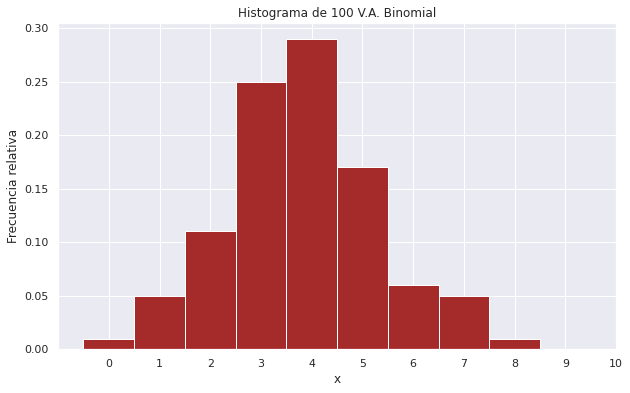

In [4]:
plt.figure(figsize=(10,6))
VA_bi=VA_bi()
plt.hist(VA_bi, bins=np.arange(-0.5, 10.5, 1), color='brown', density=True)
plt.xticks(np.arange(0,11))
plt.title('Histograma de 100 V.A. Binomial')
plt.xlabel('x')
plt.ylabel('Frecuencia relativa')
plt.show()

Se realiza un programa para calcular la fecuencia de cada valor

In [5]:
def frec_bi():
    VA_bi.sort() #ordeno
    lista=[]
    for j in range(10+1): #recorre los valores de 'x'
        s=0
        for i in range(len(VA_bi)): #recorre las variables sorteadas
            x = VA_bi[i]     
            if (x<=j) and (j<x+1): 
                s=s+1
            else:
                None
        lista.append(s/100)
    return lista
#
fi=frec_bi()  #frecuencia empírica
print('Frecuencias relativas empíricas de cada x:', fi)

Frecuencias relativas empíricas de cada x: [0.01, 0.05, 0.11, 0.25, 0.29, 0.17, 0.06, 0.05, 0.01, 0.0, 0.0]


## (b) Calcule el estadı́stico $\chi^2$ a partir del modelo y de los datos simulados.

Primero se contruyte y grafica la distribución binomial teórica usando la función 'st.binom.pmf':

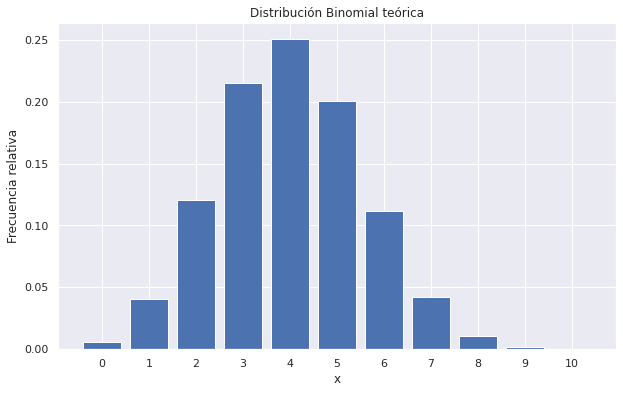

In [6]:
teo_bi=st.binom.pmf(k=range(11), n=10, p=0.4)  #frecuencias teóricas

plt.figure(figsize=(10,6))
plt.bar(range(11), teo_bi)
plt.xlabel('x')
plt.xticks(np.arange(0,11))
plt.title('Distribución Binomial teórica')
plt.xlabel('x')
plt.ylabel('Frecuencia relativa')
plt.show()

Estadístico:

$$\chi^2=\sum_{i=0}^{n} \frac{(f_i - B(x=i))^2}{B(x=i)}$$

donde $f_i$ indica la frecuencia relativa empírica (calculada en el inciso a) y B(x=i) indica la distribución teórica.

Cuanto mayor sea el valor de $\chi ^{2}$, menos verosímil es que la hipótesis nula (que asume la igualdad entre ambas distribuciones) sea correcta. De la misma forma, cuanto más se aproxima a cero el valor de chi-cuadrado, más ajustadas están ambas distribuciones. 

Se calcula $\chi^2$ para las frecuencias empíricas y las teóricas:

In [7]:
chi2=0
for i in range(len(fi)):
    chi2=chi2+((fi[i]-teo_bi[i])**2/teo_bi[i])
print(chi2)

0.04922655657815326


## (c) Realice una prueba de hipótesis completa para decidir si los datos están en acuerdo con el modelo.

Etapas fundamentales del procedimiento de la PH:
1. Hipótesis

Hipótesis nula ($H_0$) e hipótesis alternativa ($H_1$):

$$H_0: \chi^2 = \chi_0^2$$
$$H_1: \chi^2 \neq \chi_0^2$$

donde $\chi^2$ es el valor empírico obtenido y $\chi_0^2$ el valor teórico.


2. Nivel de significación

El establecimiento del lı́mite de significación define dos zonas en la distribución de valores del estadı́stico: a) una zona de aceptación de $H_0$, dentro de la cual las diferencias entre el estadı́stico y el parámetro no son significativas, y b) una zona de rechazo de $H_0$ dentro de la cual las diferencias entre el estadı́stico y el
parámetro son significativas.

$$\alpha=$$


3. Estadı́stico de prueba


4. Zona de aceptación
5. Cómputos necesarios
6. Decisión
7. Conclusión

(d) Calcule el valor-p de la prueba.

(e) Simule muestras de 100 observaciones de una V.A. N(μ, σ), con σ=2.5 y μ que varı́e entre 2 y 7. Estudie
cómo varı́a el valor-p y determine si en algún rango de μ se puede “confundir” el modelo.


(f) Simule una muestra de 10000 realizaciones de una V.A. con f (x) ∼ B(n = 1000, p = 0.4) y repita el punto
anterior.